# Dataset Downoad & Import Library

In [1]:
# Dataset Download
!mkdir -p ~/.kaggle
!cp '/content/drive/Othercomputers/내 컴퓨터/Colab/kaggle.json' ~/.kaggle/ #my kaggle token
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sakshigoyal7/credit-card-customers

# unzip file
!unzip '/content/credit-card-customers.zip'

100% 379k/379k [00:00<00:00, 1.00MB/s]
100% 379k/379k [00:00<00:00, 1.00MB/s]
Archive:  /content/credit-card-customers.zip
  inflating: BankChurners.csv        


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as ex
import plotly.figure_factory as ff
import plotly.offline as offline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Data Load

In [4]:
data = pd.read_csv('./BankChurners.csv')
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [5]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

# Preprocessing

In [6]:
# drop col
data = data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',"CLIENTNUM"], axis = 1)
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [7]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [8]:
data.isnull().sum() # no null data

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [11]:
# categorical data one hot encoding
num_data = data.copy()

num_data['Attrition_Flag'] = num_data['Attrition_Flag'].map({'Existing Customer':0, 'Attrited Customer':1})
num_data['Income_Category'] = num_data['Income_Category'].map({'Unknown':0, 'Less than $40K':0, '$40K - $60K':1, '$60K - $80K':2, '$80K - $120K':3, '$120K +':4})
num_data['Marital_Status'] = num_data['Marital_Status'].map({'Divorced':0, 'Unknown':0, 'Single':0, 'Married':1})
num_data['Education_Level'] = num_data['Education_Level'].map({'Unknown':0, 'Uneducated':0, 'High School':1, 'College':2,'Graduate':3,'Post-Graduate':4,'Doctorate':5})
num_data['Card_Category'] = num_data['Card_Category'].map({'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3})


num_data = pd.get_dummies(num_data) #Gender
num_data.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M
0,0,45,3,1,1,2,0,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1
1,0,49,5,3,0,0,0,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0
2,0,51,3,3,1,3,0,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1
3,0,40,4,1,0,0,0,34,3,4,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0
4,0,40,3,0,1,2,0,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1


In [12]:
# Dataset divide

X = num_data.drop(['Attrition_Flag'], axis = 1) # Features
y = num_data['Attrition_Flag'] # Labels
print(X.shape)
print(y.shape)

(10127, 20)
(10127,)


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(7088, 20)
(3039, 20)


In [14]:
# normalize
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [17]:
# Oversampling
print("Number of observations in each class before oversampling (training data): \n", pd.Series(Y_train).value_counts())

smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_resample(X_train,Y_train)

print("Number of observations in each class after oversampling (training data): \n", pd.Series(Y_train).value_counts())

Number of observations in each class before oversampling (training data): 
 0    5957
1    1131
Name: Attrition_Flag, dtype: int64
Number of observations in each class after oversampling (training data): 
 0    5957
1    5957
Name: Attrition_Flag, dtype: int64


# Bagging - RandomForest

In [18]:
# hyperparameter search
rfc = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=1)
grid_param = {'n_estimators': [200, 250, 300, 350, 400, 450]}

gd_sr = GridSearchCV(estimator=rfc, param_grid=grid_param, scoring='recall', cv=5)

gd_sr.fit(X_train, Y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifi

{'n_estimators': 400}
0.9811945294406034


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



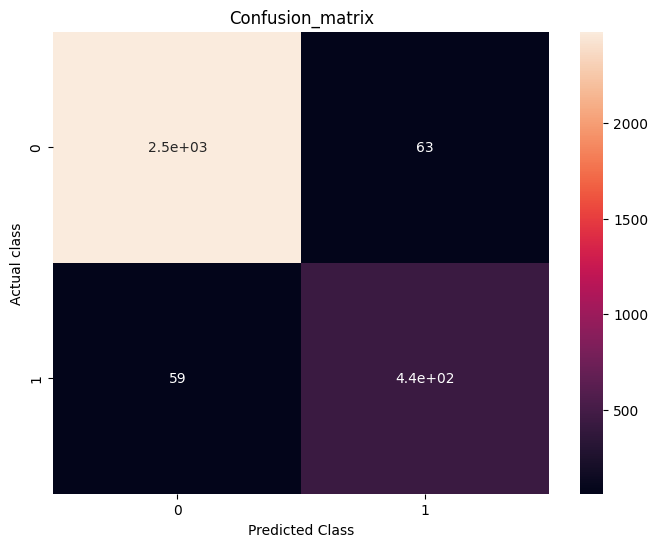

Confusion matrix: 
 [[2480   63]
 [  59  437]]
TP:  437
TN:  2480
FP:  63
FN:  59


In [20]:
rfc = RandomForestClassifier(n_estimators=400, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,Y_train)

Y_pred = rfc.predict(X_test)

conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

In [21]:
print(metrics.classification_report(Y_test,rfc.predict(X_test)))
print('Accuracy_Score:',accuracy_score(Y_test,Y_pred)*100,'%')
print('Recall:',metrics.recall_score(Y_test,Y_pred)*100,'%')

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.87      0.88      0.88       496

    accuracy                           0.96      3039
   macro avg       0.93      0.93      0.93      3039
weighted avg       0.96      0.96      0.96      3039

Accuracy_Score: 95.98552155314249 %
Recall: 88.10483870967742 %


# Boosting - AdaBoost

In [22]:
# grid search
abc = AdaBoostClassifier(random_state=1)
grid_param = {'n_estimators': [5,10,20,30,40,50]}

gd_sr = GridSearchCV(estimator=abc, param_grid=grid_param, scoring='recall', cv=5)

gd_sr.fit(X_train, Y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_
print(best_result)

{'n_estimators': 40}
0.944929955651728


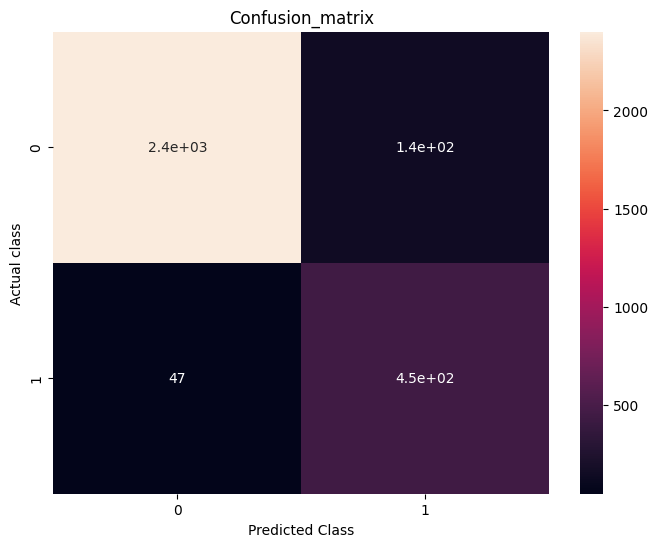

Confusion matrix: 
 [[2401  142]
 [  47  449]]
TP:  449
TN:  2401
FP:  142
FN:  47


In [23]:
abc = AdaBoostClassifier(n_estimators=40, random_state=1)
abc.fit(X_train,Y_train)

Y_pred = abc.predict(X_test)

conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

In [24]:
print('Classification report: \n', metrics.classification_report(Y_test, Y_pred))
print('Accuracy_Score:',accuracy_score(Y_test, Y_pred)*100,'%')
print('Recall:',metrics.recall_score(Y_test, Y_pred)*100,'%')

Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      2543
           1       0.76      0.91      0.83       496

    accuracy                           0.94      3039
   macro avg       0.87      0.92      0.89      3039
weighted avg       0.94      0.94      0.94      3039

Accuracy_Score: 93.78084896347482 %
Recall: 90.5241935483871 %
